In [1]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt

# Used for data storage and manipulation 
import numpy as np
import pandas as pd

# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For stepwise regression
import statsmodels.api as sm

# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [2]:
# Load NFL data 
data = pd.read_csv("NFL data.csv")

In [3]:
# adding .head() to your dataset allows you to see the first rows in the dataset. 
# Add a # inside the brackets to specificy how many rows are returned or else 5 rows are returned.
print(data.shape)
# (12144, 18)
data.head()

(12144, 18)


,schedule_date,schedule_season,schedule_week,team_home,team_away,stadium,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,stadium_neutral,schedule_playoff,game_id
0,09/02/1966,1966,1,Miami Dolphins,Oakland Raiders,Orange Bowl,NaN,NaN,NaN,NaN,83.0,6.0,71,14,23,False,False,19660902OAKMIA
1,09/03/1966,1966,1,Houston Oilers,Denver Broncos,Rice Stadium,NaN,NaN,NaN,NaN,81.0,7.0,70,45,7,False,False,19660903DENTEN
2,09/04/1966,1966,1,San Diego Chargers,Buffalo Bills,Balboa Stadium,NaN,NaN,NaN,NaN,70.0,7.0,82,27,7,False,False,19660904BUFLAC
3,09/09/1966,1966,2,Miami Dolphins,New York Jets,Orange Bowl,NaN,NaN,NaN,NaN,82.0,11.0,78,14,19,False,False,19660909NYJMIA
4,09/10/1966,1966,1,Green Bay Packers,Baltimore Colts,Lambeau Field,NaN,NaN,NaN,64 degrees- humidity 62%- wind 8 mph,64.0,8.0,62,24,3,False,False,19660910INDGB


In [4]:
# return only rows where the year is greater than 2009
current = data[(data['schedule_season'] > 2009)]

In [5]:
# check for the null values in each column
current.isna().sum()

schedule_date             0
schedule_season           0
schedule_week             0
team_home                 0
team_away                 0
stadium                  52
team_favorite_id          0
spread_favorite           0
over_under_line           0
weather_detail         1498
weather_temperature      41
weather_wind_mph         41
weather_humidity       1466
score_home                0
score_away                0
stadium_neutral           0
schedule_playoff          0
game_id                 344
dtype: int64

In [6]:
# Delete Columns with missing value greater than 20%
current = current.dropna(thresh=0.8*len(current), axis=1)

In [7]:
# check AGAIN for the null values in each column 
current.isna().sum()

schedule_date            0
schedule_season          0
schedule_week            0
team_home                0
team_away                0
stadium                 52
team_favorite_id         0
spread_favorite          0
over_under_line          0
weather_temperature     41
weather_wind_mph        41
score_home               0
score_away               0
stadium_neutral          0
schedule_playoff         0
game_id                344
dtype: int64

In [8]:
current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 10008 to 12143
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        2136 non-null   object 
 1   schedule_season      2136 non-null   int64  
 2   schedule_week        2136 non-null   object 
 3   team_home            2136 non-null   object 
 4   team_away            2136 non-null   object 
 5   stadium              2084 non-null   object 
 6   team_favorite_id     2136 non-null   object 
 7   spread_favorite      2136 non-null   float64
 8   over_under_line      2136 non-null   object 
 9   weather_temperature  2095 non-null   float64
 10  weather_wind_mph     2095 non-null   float64
 11  score_home           2136 non-null   int64  
 12  score_away           2136 non-null   int64  
 13  stadium_neutral      2136 non-null   bool   
 14  schedule_playoff     2136 non-null   bool   
 15  game_id              1792 non-nul

In [9]:
# Gives you summary statistics on your numeric columns
current.describe()

,schedule_season,spread_favorite,weather_temperature,weather_wind_mph,score_home,score_away
count,2136.000000,2136.000000,2095.000000,2095.000000,2136.000000,2136.000000
mean,2013.500000,-5.218399,62.324582,4.767542,23.859082,21.334738
std,2.291824,3.297460,15.669602,4.575682,10.382398,9.777852
min,2010.000000,-26.500000,-6.000000,0.000000,0.000000,0.000000
25%,2011.750000,-7.000000,53.000000,0.000000,17.000000,14.000000
50%,2013.500000,-4.000000,68.000000,4.000000,24.000000,21.000000
75%,2015.250000,-3.000000,72.000000,7.000000,31.000000,27.000000
max,2017.000000,0.000000,93.000000,40.000000,62.000000,59.000000


In [10]:
current.head(10)

,schedule_date,schedule_season,schedule_week,team_home,team_away,stadium,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,score_home,score_away,stadium_neutral,schedule_playoff,game_id
10008,09/09/2010,2010,1,New Orleans Saints,Minnesota Vikings,Louisiana Superdome,NO,-5.0,49.5,72.0,0.0,14,9,False,False,20100909MINNO
10009,09/12/2010,2010,1,Buffalo Bills,Miami Dolphins,Ralph Wilson Stadium,MIA,-3.0,39,64.0,7.0,10,15,False,False,20100912MIABUF
10010,09/12/2010,2010,1,Chicago Bears,Detroit Lions,Soldier Field,CHI,-6.5,45,75.0,1.0,19,14,False,False,20100912DETCHI
10011,09/12/2010,2010,1,Houston Texans,Indianapolis Colts,Reliant Stadium,IND,-1.0,48,89.0,5.0,34,24,False,False,20100912INDHOU
10012,09/12/2010,2010,1,Jacksonville Jaguars,Denver Broncos,EverBank Field,JAX,-3.0,41.5,91.0,1.0,24,17,False,False,20100912DENJAX
10013,09/12/2010,2010,1,New England Patriots,Cincinnati Bengals,Gillette Stadium,NE,-5.5,45,63.0,10.0,38,24,False,False,20100912CINNE
10014,09/12/2010,2010,1,New York Giants,Carolina Panthers,MetLife Stadium,NYG,-6.0,41,65.0,1.0,31,18,False,False,20100912CARNYG
10015,09/12/2010,2010,1,Philadelphia Eagles,Green Bay Packers,Lincoln Financial Field,GB,-3.0,48,69.0,4.0,20,27,False,False,20100912GBPHI
10016,09/12/2010,2010,1,Pittsburgh Steelers,Atlanta Falcons,Heinz Field,ATL,-1.5,39.5,65.0,9.0,15,9,False,False,20100912ATLPIT
10017,09/12/2010,2010,1,Seattle Seahawks,San Francisco 49ers,CenturyLink Field,SF,-3.0,37,64.0,11.0,31,6,False,False,20100912SFSEA


In [11]:
#  no warning message and no exception is raised
pd.options.mode.chained_assignment = None  # default='warn'
# Create a column titled home or away. This column will add a 1 to the row where the New England Patriots played at home 
# and a 0 for away games.
current['home_or_away'] = np.where(current['team_home'] == 'New England Patriots', 1, 0)

In [12]:
# Return rows where New England Patriots are either the home or away team
current2 = current.loc[(current["team_home"] == "New England Patriots") | (current["team_away"] == "New England Patriots")]

# filter to certain columns
final = current2.filter(["team_home","team_away" , "score_home","score_away" ,"weather_temperature","weather_wind_mph","home_or_away", "over_under_line"])

# merge score_away & score_home into column 'score'
final['score'] = np.where(final['team_away'] == 'New England Patriots', final['score_away'], final['score_home'])


# Before showing our final dataset we will drop any rows with NA values.
final = final.dropna()
final.head()

,team_home,team_away,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away,over_under_line,score
10013,New England Patriots,Cincinnati Bengals,38,24,63.0,10.0,1,45,38
10034,New York Jets,New England Patriots,28,14,82.0,6.0,0,39.5,14
10049,New England Patriots,Buffalo Bills,38,30,68.0,11.0,1,43,38
10069,Miami Dolphins,New England Patriots,14,41,81.0,1.0,0,48,41
10089,New England Patriots,Baltimore Ravens,23,20,57.0,14.0,1,44.5,23


In [13]:
final['2_game_avg'] = final.score.shift(periods=1).rolling(window=2).mean()
final['5_game_avg'] = final.score.shift(periods=1).rolling(window=5).mean()
final.head(10)

,team_home,team_away,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away,over_under_line,score,2_game_avg,5_game_avg
10013,New England Patriots,Cincinnati Bengals,38,24,63.0,10.0,1,45,38,NaN,NaN
10034,New York Jets,New England Patriots,28,14,82.0,6.0,0,39.5,14,NaN,NaN
10049,New England Patriots,Buffalo Bills,38,30,68.0,11.0,1,43,38,26.0,NaN
10069,Miami Dolphins,New England Patriots,14,41,81.0,1.0,0,48,41,26.0,NaN
10089,New England Patriots,Baltimore Ravens,23,20,57.0,14.0,1,44.5,23,39.5,NaN
10107,San Diego Chargers,New England Patriots,20,23,69.0,7.0,0,49.5,23,32.0,30.8
10117,New England Patriots,Minnesota Vikings,28,18,52.0,16.0,1,45,28,23.0,27.8
10129,Cleveland Browns,New England Patriots,34,14,44.0,13.0,0,43.5,14,25.5,30.6
10148,Pittsburgh Steelers,New England Patriots,26,39,50.0,8.0,0,45,39,21.0,25.8
10159,New England Patriots,Indianapolis Colts,31,28,37.0,6.0,1,50,31,26.5,25.4


In [14]:
# Fill in the first 2 instances & first 5 instances with mean 
final = final.fillna(final.mean())

In [15]:
# This time we're checking for Outliers. Check each columns min & max to make sure the # is plausible
final.describe()

,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away,score,2_game_avg,5_game_avg
count,139.000000,139.000000,139.000000,139.00000,139.000000,139.000000,139.000000,139.000000
mean,26.143885,23.848921,55.446043,6.42446,0.532374,30.309353,30.284672,30.297015
std,10.895127,10.822624,16.795088,4.48666,0.500755,9.915475,7.514671,5.245660
min,0.000000,0.000000,13.000000,0.00000,0.000000,0.000000,13.000000,19.000000
25%,20.000000,17.000000,43.500000,3.00000,0.000000,23.000000,25.500000,26.400000
50%,27.000000,23.000000,58.000000,6.00000,1.000000,30.000000,30.500000,30.297015
75%,33.500000,31.000000,68.500000,9.00000,1.000000,36.000000,35.250000,34.000000
max,59.000000,52.000000,89.000000,22.00000,1.000000,59.000000,54.000000,43.800000


In [16]:
df = final[['weather_temperature','weather_wind_mph' ,'over_under_line','home_or_away', '2_game_avg','5_game_avg', 'score']]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 10013 to 12143
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_temperature  139 non-null    float64
 1   weather_wind_mph     139 non-null    float64
 2   over_under_line      139 non-null    object 
 3   home_or_away         139 non-null    int32  
 4   2_game_avg           139 non-null    float64
 5   5_game_avg           139 non-null    float64
 6   score                139 non-null    int64  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 8.1+ KB


In [18]:
# Need to convert three columns to  float64 Dtype
df['home_or_away'] = df['home_or_away'].astype('float64')
df['over_under_line'] = df['over_under_line'].astype('float64')
df['score'] = df['score'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 10013 to 12143
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_temperature  139 non-null    float64
 1   weather_wind_mph     139 non-null    float64
 2   over_under_line      139 non-null    float64
 3   home_or_away         139 non-null    float64
 4   2_game_avg           139 non-null    float64
 5   5_game_avg           139 non-null    float64
 6   score                139 non-null    float64
dtypes: float64(7)
memory usage: 8.7 KB


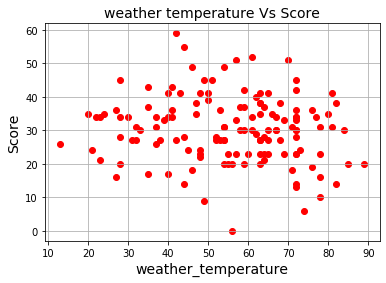

In [19]:
plt.scatter(df['weather_temperature'], df['score'], color='red')
plt.title('weather temperature Vs Score', fontsize=14)
plt.xlabel('weather_temperature', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

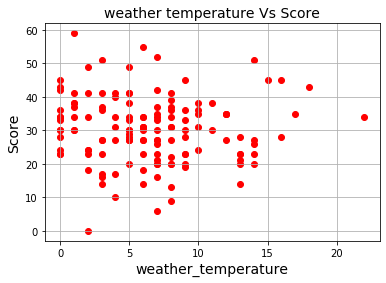

In [20]:
plt.scatter(df['weather_wind_mph'], df['score'], color='red')
plt.title('weather temperature Vs Score', fontsize=14)
plt.xlabel('weather_temperature', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

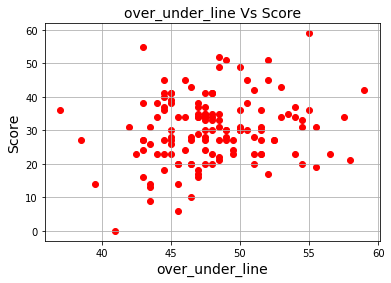

In [21]:
plt.scatter(df['over_under_line'], df['score'], color='red')
plt.title('over_under_line Vs Score', fontsize=14)
plt.xlabel('over_under_line', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

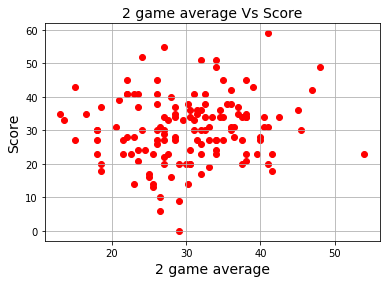

In [22]:
plt.scatter(df['2_game_avg'], df['score'], color='red')
plt.title('2 game average Vs Score', fontsize=14)
plt.xlabel('2 game average', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

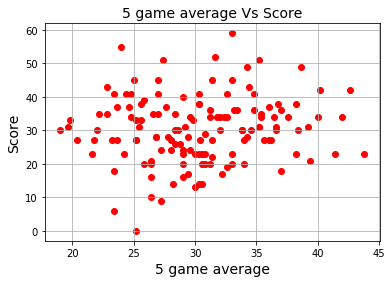

In [23]:
plt.scatter(df['5_game_avg'], df['score'], color='red')
plt.title('5 game average Vs Score', fontsize=14)
plt.xlabel('5 game average', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

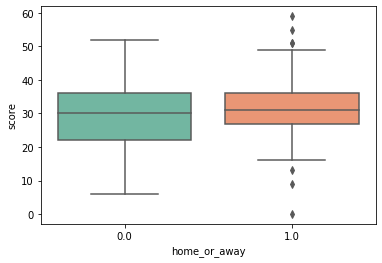

In [24]:
sns.boxplot(x ="home_or_away", y = "score", data = df, palette="Set2")

In [25]:
corr = df.corr()
corr

,weather_temperature,weather_wind_mph,over_under_line,home_or_away,2_game_avg,5_game_avg,score
weather_temperature,1.000000,-0.111101,0.151726,-0.281754,0.075318,0.052933,-0.116059
weather_wind_mph,-0.111101,1.000000,-0.050667,0.253477,-0.006267,-0.046910,-0.042880
over_under_line,0.151726,-0.050667,1.000000,-0.051578,0.244740,0.362530,0.178719
home_or_away,-0.281754,0.253477,-0.051578,1.000000,-0.018835,-0.028381,0.135884
2_game_avg,0.075318,-0.006267,0.244740,-0.018835,1.000000,0.705450,0.110379
5_game_avg,0.052933,-0.046910,0.362530,-0.028381,0.705450,1.000000,0.110091
score,-0.116059,-0.042880,0.178719,0.135884,0.110379,0.110091,1.000000


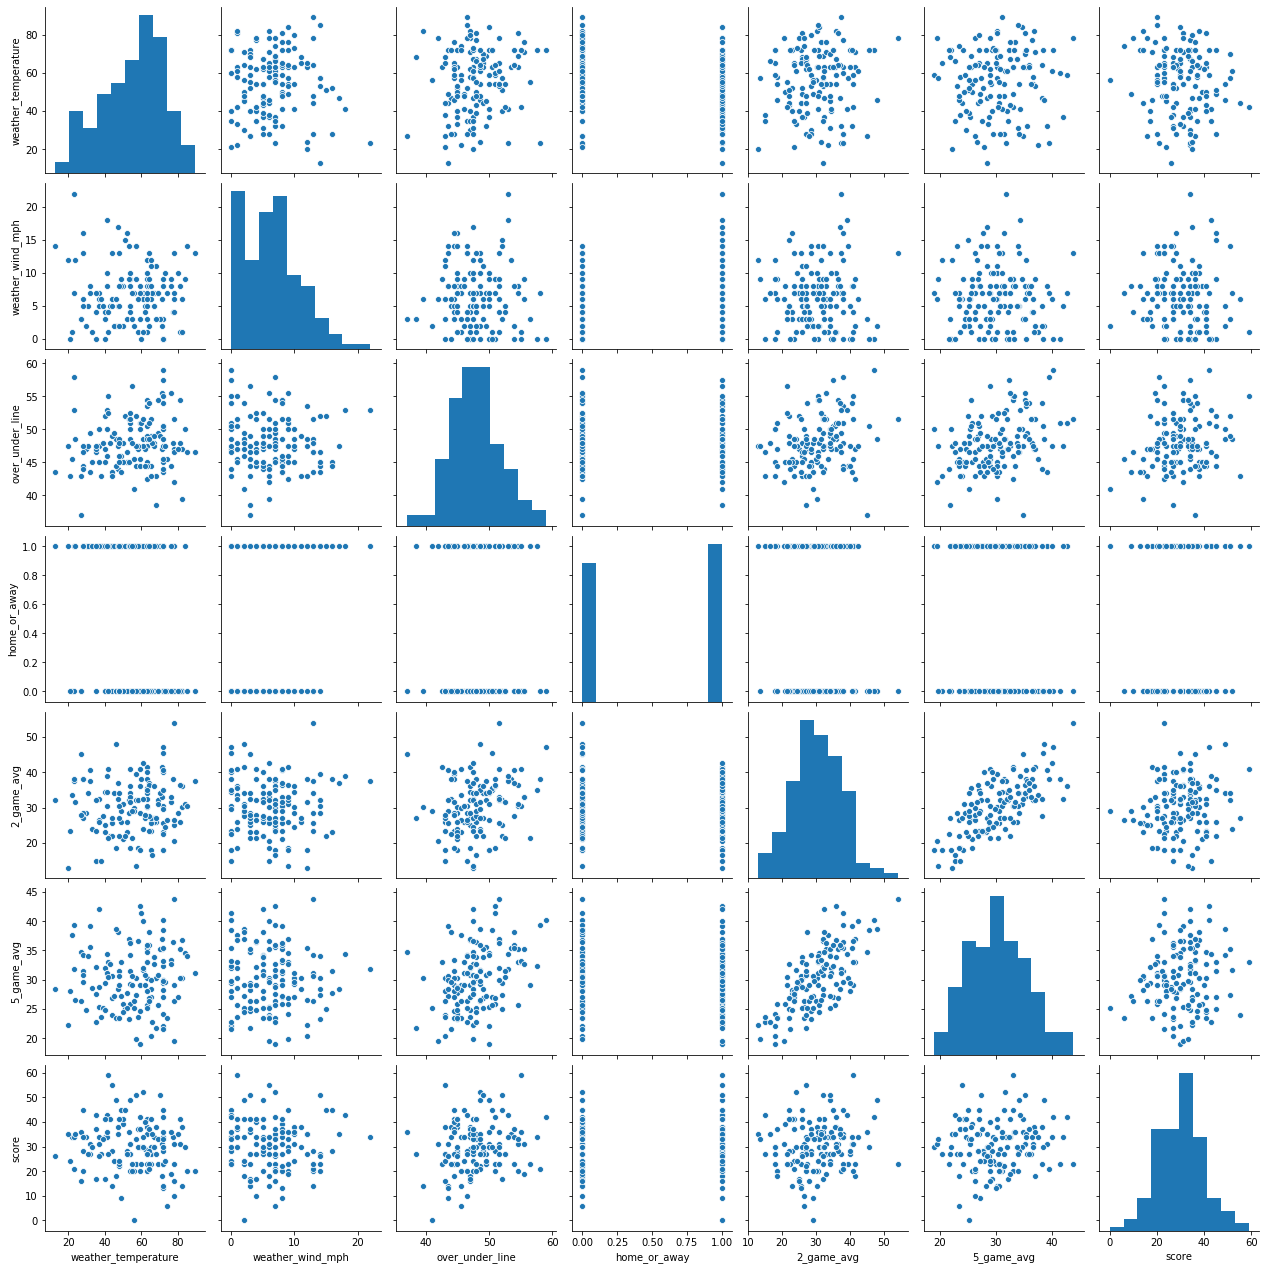

In [26]:
# More optional EDA
pairplot(df)

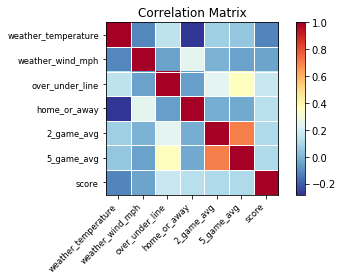

In [27]:
# More optional EDA
fig= plot_corr(corr,xnames=corr.columns)

In [28]:
X = pd.DataFrame(df, columns = ['weather_temperature', 'home_or_away'])
y = pd.DataFrame(df, columns=['score'])

# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

       weather_temperature  home_or_away
12057                 48.0           0.0
       weather_temperature  home_or_away
11099                 65.0           0.0
       score
12057   23.0
       score
11099   30.0


In [29]:
# Create linear regression model
lin_reg_mod = LinearRegression()

# Fit linear regression
lin_reg_mod.fit(X_train, y_train)

# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [30]:
# Get the slope and intercept of the line best fit.
print(lin_reg_mod.intercept_)


print(lin_reg_mod.coef_)

[31.18957055]
[[-0.07207217  3.56622592]]


In [31]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)

# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)
# The closer towards 1, the better the fit
print(test_set_r2)

11.198808111320076
-0.3664617656751419


In [32]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['score']) - abs(df_results['Predicted'])
print(df_results)

       score  Predicted  Residuals
11099   30.0  26.504879   3.495121
10980   34.0  33.098137   0.901863
10704   49.0  27.874251  21.125749
11694   35.0  29.999033   5.000967
10107   23.0  26.216591  -3.216591
11343   28.0  30.143178  -2.143178
10488   41.0  26.649024  14.350976
10333   31.0  26.072446   4.927554
10991   34.0  26.360735   7.639265
11229   42.0  26.000374  15.999626
11310   17.0  28.667045 -11.667045
10234   34.0  29.603983   4.396017
11642   27.0  29.854889  -2.854889
11033   41.0  26.504879  14.495121
10760   34.0  32.089126   1.910874
12046   35.0  31.368404   3.631596
11293   41.0  31.656693   9.343307
10910   27.0  26.504879   0.495121
10612   31.0  30.863899   0.136101
11502   20.0  32.737776 -12.737776
10593   52.0  26.793168  25.206832
10525   49.0  30.863899  18.136101
10565   18.0  29.638672 -11.638672
10299   35.0  30.215250   4.784750
10935   55.0  31.584621  23.415379
11747   24.0  31.512549  -7.512549
10657   45.0  27.658034  17.341966
12109   37.0  32.233

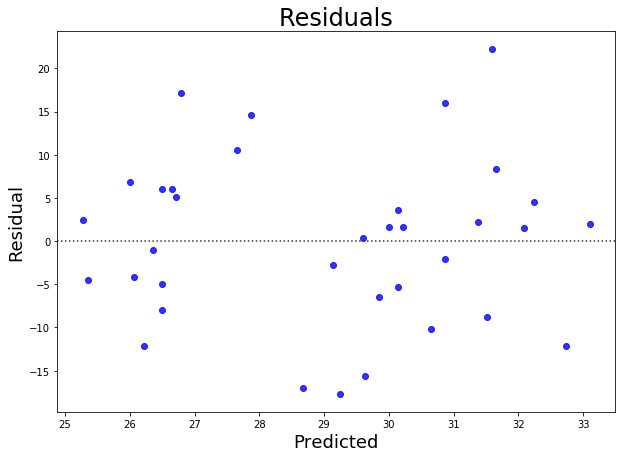

In [33]:
# Residual plot using df_result
fig = plt.figure(figsize=(10,7))
sns.residplot(x = "Predicted", y = "score",data = df_results, color='blue')

# Title and labels.
plt.title('Residuals', size=24)
plt.xlabel('Predicted', size=18)
plt.ylabel('Residual', size=18);

Text(0.5, 1, 'Actual vs. Predicted')

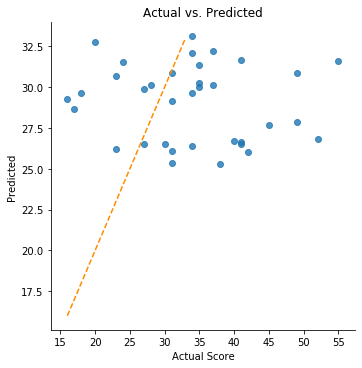

In [34]:
# Plotting the actual vs predicted values
sns.lmplot(x='score', y='Predicted', data=df_results, fit_reg=False)

line_coords = np.arange(df_results.score.min().min(), df_results.Predicted.max().max())

plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')

plt.xlabel('Actual Score', size=10)

plt.title('Actual vs. Predicted')

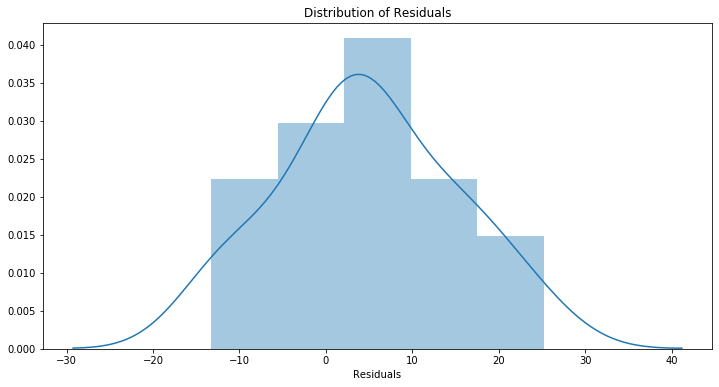

In [35]:
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [36]:
df2 = df[['weather_temperature', 'home_or_away', 'score']]
corr2 = df2.corr()

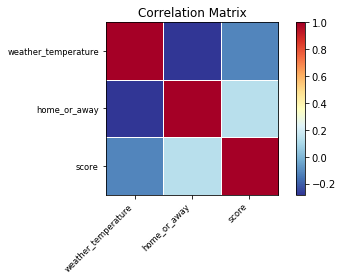

In [37]:
fig= plot_corr(corr2,xnames=corr2.columns)